O conjunto de dados de vendas disponíveis para 45 lojas do Walmart. O negócio enfrenta um desafio devido a demandas imprevistas e às vezes fica sem estoque. Neste projeto será feito, uma análise exploratória, e modelo de machine learning de regressão, utilizando o algoritmo de regressão linear.

Link dataset: https://www.kaggle.com/datasets/yasserh/walmart-dataset

Os dados carregados contêm as seguintes colunas:

Store: identificador da loja.

Date: data da observação.

Weekly_Sales: vendas semanais.

Holiday_Flag: uma flag indicando se a semana inclui um feriado.

Temperature: temperatura.

Fuel_Price: preço do combustível.

CPI: índice de preços ao consumidor.

Unemployment: taxa de desemprego.

In [ ]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("/content/drive/MyDrive/Dataset Walmart Vendas/Walmart.csv")

# Visualizar as primeiras linhas da tabela
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Verificando valores ausentes
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Nâo temos valores ausentes em nenhuma das colunas.

In [ ]:
# Obtendo estatísticas descritivas
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Alguns gráficos para visualizar a distribuição e as relações entre as variáveis.

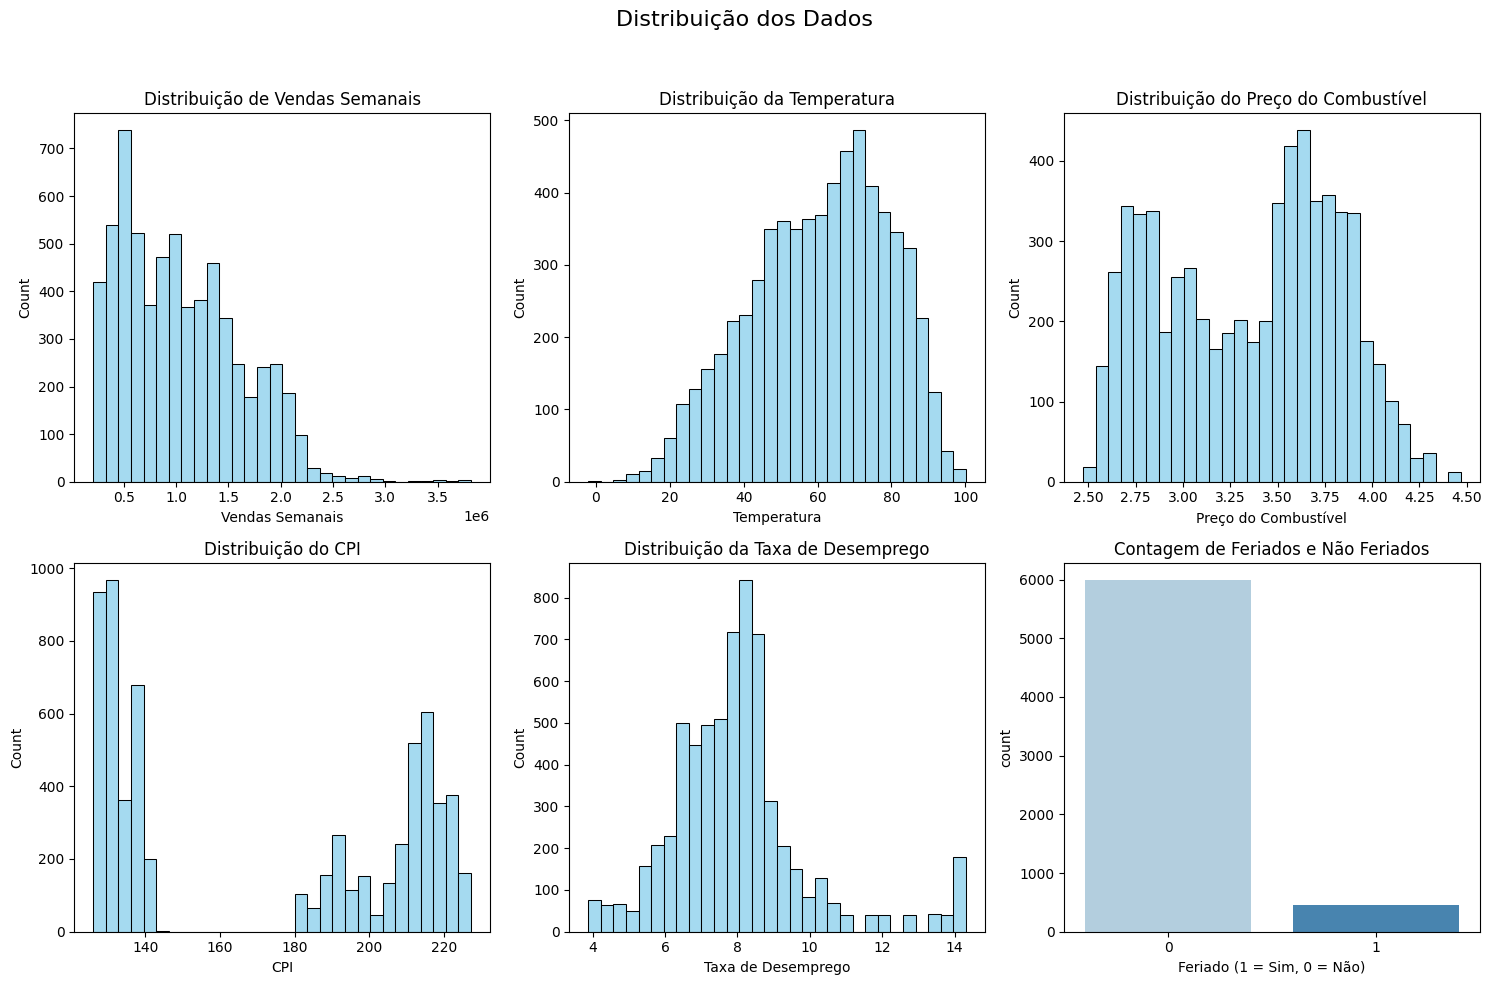

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando visualizações para entender melhor a distribuição dos dados
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribuição dos Dados', fontsize=16)

# Histograma de vendas semanais
sns.histplot(df['Weekly_Sales'], bins=30, ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('Distribuição de Vendas Semanais')
ax[0, 0].set_xlabel('Vendas Semanais')

# Histograma da temperatura
sns.histplot(df['Temperature'], bins=30, ax=ax[0, 1], color='skyblue')
ax[0, 1].set_title('Distribuição da Temperatura')
ax[0, 1].set_xlabel('Temperatura')

# Histograma do preço do combustível
sns.histplot(df['Fuel_Price'], bins=30, ax=ax[0, 2], color='skyblue')
ax[0, 2].set_title('Distribuição do Preço do Combustível')
ax[0, 2].set_xlabel('Preço do Combustível')

# Histograma do CPI
sns.histplot(df['CPI'], bins=30, ax=ax[1, 0], color='skyblue')
ax[1, 0].set_title('Distribuição do CPI')
ax[1, 0].set_xlabel('CPI')

# Histograma do Desemprego
sns.histplot(df['Unemployment'], bins=30, ax=ax[1, 1], color='skyblue')
ax[1, 1].set_title('Distribuição da Taxa de Desemprego')
ax[1, 1].set_xlabel('Taxa de Desemprego')

# Contagem de valores para a flag de feriado
sns.countplot(x='Holiday_Flag', data=df, ax=ax[1, 2], palette='Blues')
ax[1, 2].set_title('Contagem de Feriados e Não Feriados')
ax[1, 2].set_xlabel('Feriado (1 = Sim, 0 = Não)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Store: Varia de 1 a 45, indicando que temos dados de 45 lojas diferentes.

Weekly_Sales: As vendas semanais têm uma média de aproximadamente 1.047.000, com um mínimo de aproximadamente 209.986 e um máximo de aproximadamente 3.819.000. A distribuição é inclinada para a direita, indicando a presença de algumas semanas/lojas com vendas excepcionalmente altas.

Holiday_Flag: A média é de 0.07, indicando que a maioria das entradas não ocorre durante uma semana de feriado (como esperado).

Temperature: Varia de -2.06 a 100.14, provavelmente em graus Fahrenheit, com uma média de 60.66.

Fuel_Price: O preço do combustível varia de 2.472 a 4.468, com uma média de 3.359.

CPI: O Índice de Preços ao Consumidor (CPI) varia de 126.064 a 227.233, com uma média de 171.578.

Unemployment: A taxa de desemprego varia de 3.879 a 14.313, com uma média de 8.000.

A matriz de correlação nos ajuda a entender a relação linear entre variáveis numéricas. Quanto mais próximo o valor de correlação estiver de 1 ou -1, mais forte é a relação positiva ou negativa, respectivamente, entre as duas variáveis.

In [ ]:
# Calculando a matriz de correlação
df.corr()

<ipython-input-7-a707b1dd92fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<ipython-input-9-324501bf82b5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


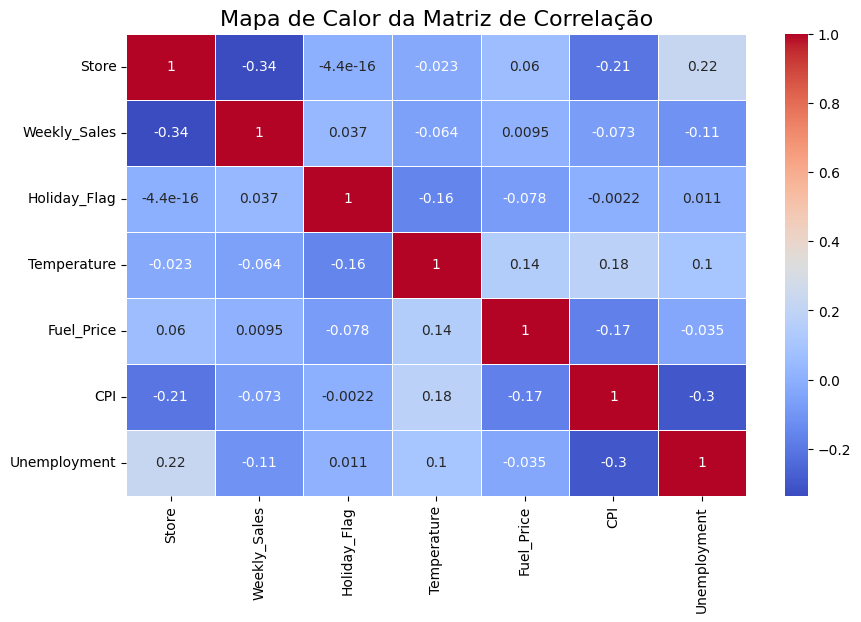

In [ ]:
# Visualizando a matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação', fontsize=16)
plt.show()

Store e Weekly_Sales: Correlação negativa (-0.335), indicando que, em geral, à medida que o identificador da loja aumenta, as vendas semanais tendem a diminuir.

Holiday_Flag e Weekly_Sales: Correlação positiva baixa (0.037), indicando que as vendas semanais são ligeiramente maiores nas semanas de feriado.

Temperature e Weekly_Sales: Correlação negativa baixa (-0.064), mostrando que a temperatura tem um pequeno impacto negativo nas vendas semanais.

CPI e Unemployment: Correlação negativa moderada (-0.302), indicando que onde o CPI é alto, a taxa de desemprego tende a ser menor e vice-versa.

Fuel_Price e Temperature: Correlação positiva baixa (0.145), sugerindo uma ligeira tendência de os preços dos combustíveis aumentarem com a temperatura.

Criar um modelo preditivo usando regressão linear para prever as vendas (Weekly_Sales) com uma variável.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Modelo de uma variável
# Definindo variáveis independentes e dependentes
X_single = df[['CPI']]  # Vamos começar com CPI como recurso único
y = df['Weekly_Sales']

# Dividindo os dados em conjuntos de treinamento e teste
X_train_single, X_test_single, y_train, y_test = train_test_split(X_single, y, test_size=0.2, random_state=42)

# 2. Modelo de Recurso Único
# Criando e treinando o modelo de regressão linear
lr_single = LinearRegression()
lr_single.fit(X_train_single, y_train)

# Fazendo previsões
y_pred_single = lr_single.predict(X_test_single)

# Avaliando o desempenho do modelo
mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

mse_single, r2_single

(320370061620.88855, 0.005539275890358852)

Erro Quadrático Médio (MSE): 3.20 × 10¹¹

Coeficiente de Determinação (R²): 0.0055

Criar um modelo de regressão linear usando mais variáveis para ver se conseguimos melhorar o desempenho do modelo.

In [ ]:
#Modelo de várias variáveis

# Definindo variáveis independentes e dependentes
X_multiple = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Dividindo os dados em conjuntos de treinamento e teste
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Escalando os recursos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multiple)
X_test_scaled = scaler.transform(X_test_multiple)

# Criando e treinando o modelo de regressão linear
lr_multiple = LinearRegression()
lr_multiple.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_multiple = lr_multiple.predict(X_test_scaled)

# Avaliando o desempenho do modelo
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

# Verificando a importância das variáveis
coefficients = lr_multiple.coef_

mse_multiple, r2_multiple, coefficients

(274455221280.6605,
 0.148063534059508,
 array([-195863.64839821,   19109.94721218,  -14073.7886785 ,
          -2126.2652345 ,  -91014.28736329,  -45893.23085844]))

Erro Quadrático Médio (MSE): 2.74 × 10¹¹

Coeficiente de Determinação (R²): 0.1481

Comparação dos modelos

O MSE diminuiu, indicando um melhor ajuste do modelo aos dados.

O valor R²aumentou consideravelmente de 0.0055 para 0.1481, o que sugere que o modelo de várias variáveis é mais eficaz em prever Weekly_Sales do que o modelo de uma variável.

Conclusões

Modelo de Uma Variável vs. Modelo de Várias Variáveis: O modelo de regressão linear com várias variáveis tem um desempenho significativamente melhor do que o modelo de uma variável. Isso indica a importância de considerar múltiplos fatores ao prever as vendas semanais.

Variáveis Mais Significativas: A identificação da loja (Store) e o Índice de Preços ao Consumidor (CPI) são as variáveis mais significativas na previsão das vendas semanais, seguidas pela taxa de desemprego (Unemployment).